In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from torchvision.datasets import ImageFolder
from torchvision.models import resnet18, ResNet18_Weights
from tqdm import tqdm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [3]:
!pip install pillow
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [4]:
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.RandomRotation(degrees=10),
        transforms.GaussianBlur(kernel_size=3),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [5]:
TRAIN_ROOT = "/content/drive/MyDrive/FracAtlas/ResNet18/Train"
VAL_ROOT = "/content/drive/MyDrive/FracAtlas/ResNet18/Val"
TEST_ROOT = "/content/drive/MyDrive/FracAtlas/ResNet18/Test"

train_dataset = datasets.ImageFolder(TRAIN_ROOT, transform=data_transforms['train'])
val_dataset = datasets.ImageFolder(VAL_ROOT, transform=data_transforms['val'])
test_dataset = datasets.ImageFolder(root=TEST_ROOT, transform=data_transforms['test'])

In [6]:
#data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=30, shuffle=False)

In [15]:
model = models.resnet18(weights=ResNet18_Weights.DEFAULT)
model.fc = nn.Linear(model.fc.in_features, 2)

# Moving model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [16]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
step_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

## Model Training

In [17]:
# Training loop
train_accuracies = []
val_accuracies = []
train_losses = []
val_losses = []
num_epochs = 50
for epoch in range(num_epochs):
    running_loss = 0.0
    correct_predictions = 0
    model.train()
    running_loss = 0.0
    correct_predictions = 0

    for inputs, labels in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}'):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_predictions += torch.sum(predicted == labels)

    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = correct_predictions.item() / len(train_dataset)
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)

    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = correct_predictions.item() / len(train_dataset)
    train_losses.append(epoch_loss)
    print(f'Training Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}')

    # Validation
    model.eval()
    running_val_loss = 0.0
    correct_predictions = 0

    with torch.no_grad():
        for inputs, labels in tqdm(val_loader, desc=f'Validation Epoch {epoch + 1}/{num_epochs}'):
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            correct_predictions += torch.sum(predicted == labels)
            running_val_loss += criterion(outputs, labels).item()

    step_lr_scheduler.step()
    val_accuracy = correct_predictions.item() / len(val_dataset)
    val_loss = running_val_loss / len(val_loader)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f'Validation Accuracy: {val_accuracy:.4f}')

print('Training complete!')

Epoch 1/50: 100%|██████████| 36/36 [00:20<00:00,  1.71it/s]


Training Loss: 0.7620, Accuracy: 0.6237


Validation Epoch 1/50: 100%|██████████| 6/6 [00:02<00:00,  2.39it/s]


Validation Accuracy: 0.6059


Epoch 2/50: 100%|██████████| 36/36 [00:21<00:00,  1.69it/s]


Training Loss: 0.5929, Accuracy: 0.6781


Validation Epoch 2/50: 100%|██████████| 6/6 [00:04<00:00,  1.49it/s]


Validation Accuracy: 0.6176


Epoch 3/50: 100%|██████████| 36/36 [00:21<00:00,  1.64it/s]


Training Loss: 0.5857, Accuracy: 0.6930


Validation Epoch 3/50: 100%|██████████| 6/6 [00:02<00:00,  2.39it/s]


Validation Accuracy: 0.6882


Epoch 4/50: 100%|██████████| 36/36 [00:21<00:00,  1.69it/s]


Training Loss: 0.5332, Accuracy: 0.7316


Validation Epoch 4/50: 100%|██████████| 6/6 [00:03<00:00,  1.70it/s]


Validation Accuracy: 0.6294


Epoch 5/50: 100%|██████████| 36/36 [00:22<00:00,  1.61it/s]


Training Loss: 0.5524, Accuracy: 0.7158


Validation Epoch 5/50: 100%|██████████| 6/6 [00:02<00:00,  2.34it/s]


Validation Accuracy: 0.6235


Epoch 6/50: 100%|██████████| 36/36 [00:20<00:00,  1.75it/s]


Training Loss: 0.5604, Accuracy: 0.7070


Validation Epoch 6/50: 100%|██████████| 6/6 [00:02<00:00,  2.42it/s]


Validation Accuracy: 0.7412


Epoch 7/50: 100%|██████████| 36/36 [00:22<00:00,  1.58it/s]


Training Loss: 0.5453, Accuracy: 0.7351


Validation Epoch 7/50: 100%|██████████| 6/6 [00:03<00:00,  1.65it/s]


Validation Accuracy: 0.7353


Epoch 8/50: 100%|██████████| 36/36 [00:22<00:00,  1.58it/s]


Training Loss: 0.5181, Accuracy: 0.7465


Validation Epoch 8/50: 100%|██████████| 6/6 [00:02<00:00,  2.29it/s]


Validation Accuracy: 0.7941


Epoch 9/50: 100%|██████████| 36/36 [00:23<00:00,  1.52it/s]


Training Loss: 0.5095, Accuracy: 0.7474


Validation Epoch 9/50: 100%|██████████| 6/6 [00:03<00:00,  1.85it/s]


Validation Accuracy: 0.7235


Epoch 10/50: 100%|██████████| 36/36 [00:21<00:00,  1.67it/s]


Training Loss: 0.4877, Accuracy: 0.7754


Validation Epoch 10/50: 100%|██████████| 6/6 [00:02<00:00,  2.26it/s]


Validation Accuracy: 0.6941


Epoch 11/50: 100%|██████████| 36/36 [00:22<00:00,  1.57it/s]


Training Loss: 0.4606, Accuracy: 0.7798


Validation Epoch 11/50: 100%|██████████| 6/6 [00:03<00:00,  1.60it/s]


Validation Accuracy: 0.8176


Epoch 12/50: 100%|██████████| 36/36 [00:21<00:00,  1.70it/s]


Training Loss: 0.4162, Accuracy: 0.8167


Validation Epoch 12/50: 100%|██████████| 6/6 [00:02<00:00,  2.26it/s]


Validation Accuracy: 0.7765


Epoch 13/50: 100%|██████████| 36/36 [00:22<00:00,  1.63it/s]


Training Loss: 0.4049, Accuracy: 0.8228


Validation Epoch 13/50: 100%|██████████| 6/6 [00:04<00:00,  1.41it/s]


Validation Accuracy: 0.7824


Epoch 14/50: 100%|██████████| 36/36 [00:21<00:00,  1.64it/s]


Training Loss: 0.4151, Accuracy: 0.8149


Validation Epoch 14/50: 100%|██████████| 6/6 [00:02<00:00,  2.27it/s]


Validation Accuracy: 0.8000


Epoch 15/50: 100%|██████████| 36/36 [00:21<00:00,  1.68it/s]


Training Loss: 0.3916, Accuracy: 0.8281


Validation Epoch 15/50: 100%|██████████| 6/6 [00:03<00:00,  1.58it/s]


Validation Accuracy: 0.7647


Epoch 16/50: 100%|██████████| 36/36 [00:22<00:00,  1.57it/s]


Training Loss: 0.3758, Accuracy: 0.8351


Validation Epoch 16/50: 100%|██████████| 6/6 [00:02<00:00,  2.31it/s]


Validation Accuracy: 0.8059


Epoch 17/50: 100%|██████████| 36/36 [00:21<00:00,  1.69it/s]


Training Loss: 0.3773, Accuracy: 0.8360


Validation Epoch 17/50: 100%|██████████| 6/6 [00:02<00:00,  2.11it/s]


Validation Accuracy: 0.8000


Epoch 18/50: 100%|██████████| 36/36 [00:23<00:00,  1.51it/s]


Training Loss: 0.3779, Accuracy: 0.8404


Validation Epoch 18/50: 100%|██████████| 6/6 [00:02<00:00,  2.30it/s]


Validation Accuracy: 0.8059


Epoch 19/50: 100%|██████████| 36/36 [00:21<00:00,  1.69it/s]


Training Loss: 0.3851, Accuracy: 0.8272


Validation Epoch 19/50: 100%|██████████| 6/6 [00:02<00:00,  2.28it/s]


Validation Accuracy: 0.7824


Epoch 20/50: 100%|██████████| 36/36 [00:24<00:00,  1.49it/s]


Training Loss: 0.3445, Accuracy: 0.8491


Validation Epoch 20/50: 100%|██████████| 6/6 [00:03<00:00,  1.93it/s]


Validation Accuracy: 0.7882


Epoch 21/50: 100%|██████████| 36/36 [00:21<00:00,  1.69it/s]


Training Loss: 0.3261, Accuracy: 0.8596


Validation Epoch 21/50: 100%|██████████| 6/6 [00:02<00:00,  2.33it/s]


Validation Accuracy: 0.8059


Epoch 22/50: 100%|██████████| 36/36 [00:22<00:00,  1.63it/s]


Training Loss: 0.3272, Accuracy: 0.8623


Validation Epoch 22/50: 100%|██████████| 6/6 [00:03<00:00,  1.52it/s]


Validation Accuracy: 0.8059


Epoch 23/50: 100%|██████████| 36/36 [00:20<00:00,  1.73it/s]


Training Loss: 0.3340, Accuracy: 0.8518


Validation Epoch 23/50: 100%|██████████| 6/6 [00:02<00:00,  2.39it/s]


Validation Accuracy: 0.8059


Epoch 24/50: 100%|██████████| 36/36 [00:21<00:00,  1.71it/s]


Training Loss: 0.3277, Accuracy: 0.8746


Validation Epoch 24/50: 100%|██████████| 6/6 [00:03<00:00,  1.64it/s]


Validation Accuracy: 0.8059


Epoch 25/50: 100%|██████████| 36/36 [00:22<00:00,  1.62it/s]


Training Loss: 0.3234, Accuracy: 0.8667


Validation Epoch 25/50: 100%|██████████| 6/6 [00:02<00:00,  2.39it/s]


Validation Accuracy: 0.8118


Epoch 26/50: 100%|██████████| 36/36 [00:20<00:00,  1.73it/s]


Training Loss: 0.3168, Accuracy: 0.8623


Validation Epoch 26/50: 100%|██████████| 6/6 [00:02<00:00,  2.37it/s]


Validation Accuracy: 0.8059


Epoch 27/50: 100%|██████████| 36/36 [00:23<00:00,  1.55it/s]


Training Loss: 0.3073, Accuracy: 0.8754


Validation Epoch 27/50: 100%|██████████| 6/6 [00:03<00:00,  1.82it/s]


Validation Accuracy: 0.8059


Epoch 28/50: 100%|██████████| 36/36 [00:20<00:00,  1.73it/s]


Training Loss: 0.3123, Accuracy: 0.8588


Validation Epoch 28/50: 100%|██████████| 6/6 [00:02<00:00,  2.38it/s]


Validation Accuracy: 0.8118


Epoch 29/50: 100%|██████████| 36/36 [00:20<00:00,  1.73it/s]


Training Loss: 0.3085, Accuracy: 0.8719


Validation Epoch 29/50: 100%|██████████| 6/6 [00:04<00:00,  1.50it/s]


Validation Accuracy: 0.8059


Epoch 30/50: 100%|██████████| 36/36 [00:21<00:00,  1.67it/s]


Training Loss: 0.3141, Accuracy: 0.8711


Validation Epoch 30/50: 100%|██████████| 6/6 [00:02<00:00,  2.37it/s]


Validation Accuracy: 0.8176


Epoch 31/50: 100%|██████████| 36/36 [00:20<00:00,  1.75it/s]


Training Loss: 0.3179, Accuracy: 0.8737


Validation Epoch 31/50: 100%|██████████| 6/6 [00:02<00:00,  2.23it/s]


Validation Accuracy: 0.8118


Epoch 32/50: 100%|██████████| 36/36 [00:22<00:00,  1.57it/s]


Training Loss: 0.2925, Accuracy: 0.8763


Validation Epoch 32/50: 100%|██████████| 6/6 [00:02<00:00,  2.17it/s]


Validation Accuracy: 0.8118


Epoch 33/50: 100%|██████████| 36/36 [00:20<00:00,  1.74it/s]


Training Loss: 0.2996, Accuracy: 0.8781


Validation Epoch 33/50: 100%|██████████| 6/6 [00:02<00:00,  2.40it/s]


Validation Accuracy: 0.8176


Epoch 34/50: 100%|██████████| 36/36 [00:21<00:00,  1.68it/s]


Training Loss: 0.3176, Accuracy: 0.8553


Validation Epoch 34/50: 100%|██████████| 6/6 [00:03<00:00,  1.50it/s]


Validation Accuracy: 0.8118


Epoch 35/50: 100%|██████████| 36/36 [00:21<00:00,  1.71it/s]


Training Loss: 0.2910, Accuracy: 0.8807


Validation Epoch 35/50: 100%|██████████| 6/6 [00:02<00:00,  2.38it/s]


Validation Accuracy: 0.8118


Epoch 36/50: 100%|██████████| 36/36 [00:20<00:00,  1.74it/s]


Training Loss: 0.3035, Accuracy: 0.8702


Validation Epoch 36/50: 100%|██████████| 6/6 [00:02<00:00,  2.07it/s]


Validation Accuracy: 0.8118


Epoch 37/50: 100%|██████████| 36/36 [00:22<00:00,  1.59it/s]


Training Loss: 0.3098, Accuracy: 0.8667


Validation Epoch 37/50: 100%|██████████| 6/6 [00:02<00:00,  2.38it/s]


Validation Accuracy: 0.8059


Epoch 38/50: 100%|██████████| 36/36 [00:20<00:00,  1.76it/s]


Training Loss: 0.3102, Accuracy: 0.8675


Validation Epoch 38/50: 100%|██████████| 6/6 [00:02<00:00,  2.41it/s]


Validation Accuracy: 0.8118


Epoch 39/50: 100%|██████████| 36/36 [00:21<00:00,  1.70it/s]


Training Loss: 0.3054, Accuracy: 0.8632


Validation Epoch 39/50: 100%|██████████| 6/6 [00:03<00:00,  1.51it/s]


Validation Accuracy: 0.8118


Epoch 40/50: 100%|██████████| 36/36 [00:20<00:00,  1.73it/s]


Training Loss: 0.2954, Accuracy: 0.8702


Validation Epoch 40/50: 100%|██████████| 6/6 [00:02<00:00,  2.38it/s]


Validation Accuracy: 0.8118


Epoch 41/50: 100%|██████████| 36/36 [00:20<00:00,  1.73it/s]


Training Loss: 0.3037, Accuracy: 0.8719


Validation Epoch 41/50: 100%|██████████| 6/6 [00:02<00:00,  2.16it/s]


Validation Accuracy: 0.8118


Epoch 42/50: 100%|██████████| 36/36 [00:22<00:00,  1.61it/s]


Training Loss: 0.2926, Accuracy: 0.8807


Validation Epoch 42/50: 100%|██████████| 6/6 [00:02<00:00,  2.18it/s]


Validation Accuracy: 0.8059


Epoch 43/50: 100%|██████████| 36/36 [00:20<00:00,  1.74it/s]


Training Loss: 0.3122, Accuracy: 0.8632


Validation Epoch 43/50: 100%|██████████| 6/6 [00:02<00:00,  2.41it/s]


Validation Accuracy: 0.8118


Epoch 44/50: 100%|██████████| 36/36 [00:21<00:00,  1.69it/s]


Training Loss: 0.3057, Accuracy: 0.8675


Validation Epoch 44/50: 100%|██████████| 6/6 [00:03<00:00,  1.50it/s]


Validation Accuracy: 0.8059


Epoch 45/50: 100%|██████████| 36/36 [00:20<00:00,  1.72it/s]


Training Loss: 0.3016, Accuracy: 0.8719


Validation Epoch 45/50: 100%|██████████| 6/6 [00:02<00:00,  2.35it/s]


Validation Accuracy: 0.8000


Epoch 46/50: 100%|██████████| 36/36 [00:20<00:00,  1.72it/s]


Training Loss: 0.3027, Accuracy: 0.8649


Validation Epoch 46/50: 100%|██████████| 6/6 [00:03<00:00,  1.96it/s]


Validation Accuracy: 0.8176


Epoch 47/50: 100%|██████████| 36/36 [00:22<00:00,  1.61it/s]


Training Loss: 0.2980, Accuracy: 0.8763


Validation Epoch 47/50: 100%|██████████| 6/6 [00:02<00:00,  2.40it/s]


Validation Accuracy: 0.8118


Epoch 48/50: 100%|██████████| 36/36 [00:20<00:00,  1.73it/s]


Training Loss: 0.3152, Accuracy: 0.8623


Validation Epoch 48/50: 100%|██████████| 6/6 [00:02<00:00,  2.40it/s]


Validation Accuracy: 0.8059


Epoch 49/50: 100%|██████████| 36/36 [00:21<00:00,  1.67it/s]


Training Loss: 0.3024, Accuracy: 0.8728


Validation Epoch 49/50: 100%|██████████| 6/6 [00:03<00:00,  1.52it/s]


Validation Accuracy: 0.8118


Epoch 50/50: 100%|██████████| 36/36 [00:20<00:00,  1.74it/s]


Training Loss: 0.2979, Accuracy: 0.8789


Validation Epoch 50/50: 100%|██████████| 6/6 [00:02<00:00,  2.36it/s]

Validation Accuracy: 0.8235
Training complete!


## Plotting Accuracy and Loss History

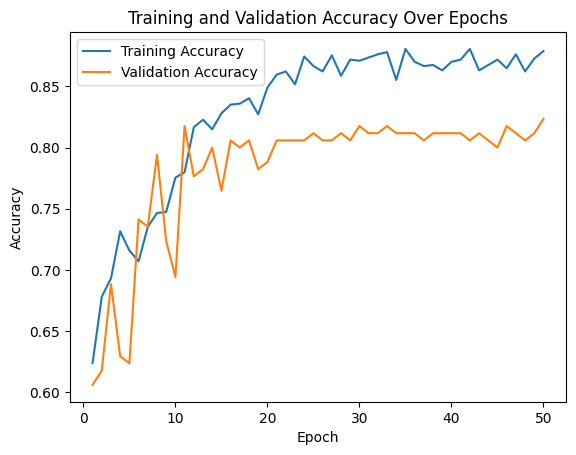

In [18]:
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.show()

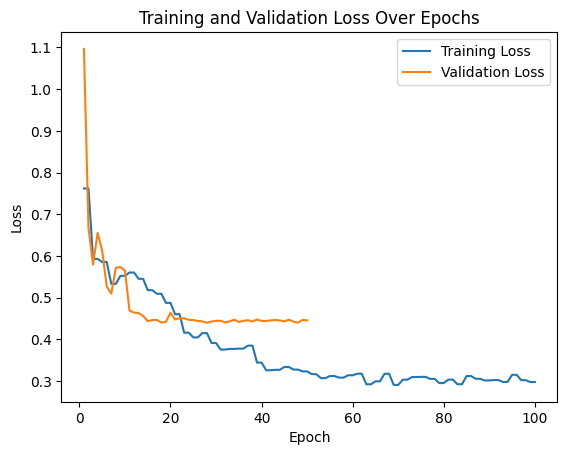

In [19]:
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

## Model Evaluation

In [20]:
model.eval()

# Lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Loop through the test set
with torch.no_grad():
    for images, labels in test_loader:
        # Move the input data to the GPU
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)

        # Get the predicted labels
        _, predicted = torch.max(outputs, 1)

        # Store true and predicted labels
        true_labels.extend(labels.cpu().numpy())
        predicted_labels.extend(predicted.cpu().numpy())

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Test Accuracy: {accuracy*100}")

Test Accuracy: 79.06976744186046


## Saving Entire Model Architecture and Saving Weights Only

In [21]:
torch.save(model, '/content/drive/MyDrive/FracAtlas/ResNet18/classification_model.pth')
torch.save(model.state_dict(), '/content/drive/MyDrive/FracAtlas/ResNet18/classification_model_state.pth')

## To Load The Model for Later Use

In [ ]:
# Load entire model
loaded_model = torch.load('path/to/save/model.pth')
# Load model's state_dict
loaded_state_dict = torch.load('path/to/save/model_state_dict.pth')